1 - Acessando os dados da tabela de alunos

In [7]:
import pandas as pd 

tabela = pd.read_excel("tabela_alunos.xlsx")
display(tabela)

,Nome,Atividade,Data,Hora
0,Maria Luiza Camargo Gonçalves,Entrou,2023-08-24,18:38:00
1,Izaura dos Santos Souza,Entrou,2023-08-24,18:38:00
2,William Lourenço de Oliveira,Entrou,2023-08-24,18:38:00
3,Fernando Marques dos Santos,Entrou,2023-08-24,18:38:00
4,Felipe de Souza Freitas,Entrou,2023-08-24,18:38:00
5,Felipe de Souza Freitas,Saiu,2023-08-24,19:59:00
6,Felipe de Souza Freitas,Entrou,2023-08-24,20:01:00
7,Rayssa Barros Alves,Entrou,2023-08-24,18:38:00
8,Carolina Aparecida Henriques Prado,Entrou,2023-08-24,18:38:00
9,Cauan Menezes de Matos Luiz,Entrou,2023-08-24,18:38:00


2 - Nomes por ordem de horario de entrada

In [8]:
coluna_horario_entrada = 'Hora'
tabela_ordenada = tabela.sort_values(by=coluna_horario_entrada)
tabela_unico = tabela_ordenada.drop_duplicates(subset='Nome')
print(tabela_unico[['Hora', 'Nome']])

        Hora                                Nome
0   18:38:00       Maria Luiza Camargo Gonçalves
14  18:38:00           Maria Elyza Andrade Silva
13  18:38:00            Kaique Donizeti da Silva
12  18:38:00                 Hyago Martinez Rubo
9   18:38:00         Cauan Menezes de Matos Luiz
16  18:38:00         Thiago Cauan de Lima Santos
7   18:38:00                 Rayssa Barros Alves
8   18:38:00  Carolina Aparecida Henriques Prado
4   18:38:00             Felipe de Souza Freitas
3   18:38:00         Fernando Marques dos Santos
2   18:38:00        William Lourenço de Oliveira
1   18:38:00             Izaura dos Santos Souza
17  18:38:00                Beatriz Lemos Soares


3 - Obter nomes de alunos por ordem alfabetica 

In [9]:
nomes = tabela["Nome"]
nomes_ordenados = nomes.unique()
nomes_ordenados.sort()
for nome in nomes_ordenados:
    display(nome)

'Beatriz Lemos Soares'

'Carolina Aparecida Henriques Prado'

'Cauan Menezes de Matos Luiz'

'Felipe de Souza Freitas'

'Fernando Marques dos Santos'

'Hyago Martinez Rubo'

'Izaura dos Santos Souza'

'Kaique Donizeti da Silva'

'Maria Elyza Andrade Silva'

'Maria Luiza Camargo Gonçalves'

'Rayssa Barros Alves'

'Thiago Cauan de Lima Santos'

'William Lourenço de Oliveira'

4 - Numero de alunos presentes na aula

In [10]:
print(f"Consta o total de {len(tabela.index)} alunos")

Consta o total de 18 alunos


5 - Entrada e saída de alunos em ordem alfabética.

In [11]:
registro = tabela[["Nome","Atividade"]].groupby(["Nome"]).sum()
display(registro)

,Atividade
Nome,
Beatriz Lemos Soares,Entrou
Carolina Aparecida Henriques Prado,Entrou
Cauan Menezes de Matos Luiz,EntrouSaiuEntrou
Felipe de Souza Freitas,EntrouSaiuEntrou
Fernando Marques dos Santos,Entrou
Hyago Martinez Rubo,Entrou
Izaura dos Santos Souza,Entrou
Kaique Donizeti da Silva,Entrou
Maria Elyza Andrade Silva,EntrouSaiu


6 - Alunos que entraram sairam e voltaram

In [12]:
registro.loc[registro["Atividade"] == "EntrouSaiuEntrou"]

,Atividade
Nome,
Cauan Menezes de Matos Luiz,EntrouSaiuEntrou
Felipe de Souza Freitas,EntrouSaiuEntrou


7 - Alunos que sairam e nao voltaram.

In [13]:
registro.loc[registro["Atividade"] == "EntrouSaiu"]

,Atividade
Nome,
Maria Elyza Andrade Silva,EntrouSaiu


8 - Gerando um gráfico com os dados da planilha.

<Figure size 1200x600 with 0 Axes>

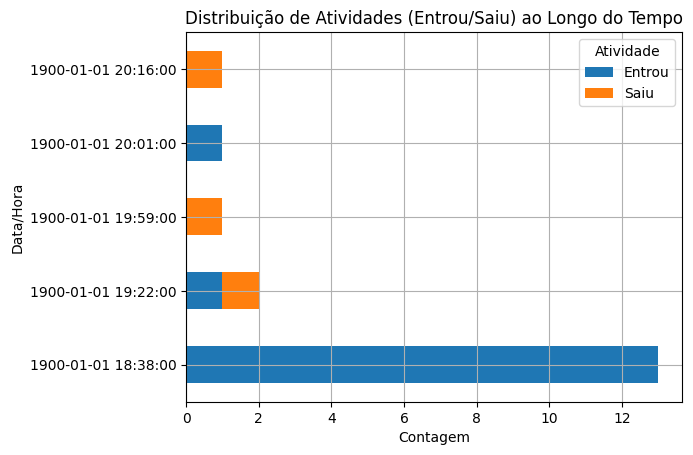

In [38]:
import matplotlib.pyplot as plt

tabela['Hora'] = pd.to_datetime(tabela['Hora'], format='%H:%M:%S')

# Criar um gráfico de barras empilhadas
plt.figure(figsize=(12, 6))  # Tamanho do gráfico

# Agrupar os dados por hora e contagem de atividades
dados_agrupados = tabela.groupby(['Hora', 'Atividade']).size().unstack(fill_value=0)

# Criar o gráfico de barras empilhadas
dados_agrupados.plot(kind='barh', stacked=True)

plt.xlabel('Contagem')
plt.ylabel('Data/Hora')
plt.title('Distribuição de Atividades (Entrou/Saiu) ao Longo do Tempo')
plt.legend(title='Atividade', loc='upper right')
plt.grid(True)  # Adiciona linhas de grade para melhorar a legibilidade
plt.savefig("grafico_01.png") #salvando o gráfico em um arquivo PNG

plt.show()






9 - Transformando esses dados em PDF